# 데이터 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
import random

%matplotlib inline

In [5]:
df = pd.read_excel("Churn.xlsx")
print(df.shape)
df.head()

(7043, 13)


,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,70,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,70,1,Offer E,3,1,0,4,Month-to-Month,8,80.65,1024.10,1
2,71,70,3,Offer D,2,0,2,4,Month-to-Month,18,95.45,1910.88,1
3,78,70,1,Offer C,2,2,2,4,Month-to-Month,25,98.50,2995.07,1
4,80,80,1,Offer C,2,0,0,4,Month-to-Month,37,76.50,3102.36,1


# 전처리

## Label Encoding

In [6]:
df['Membership'] = df['Membership'].map({'None': 0, 'Offer A': 1, 'Offer B': 2, 'Offer C': 3, 'Offer D': 4, 'Offer E': 5})
df['Contract'] = df['Contract'].map({'Month-to-Month': 1, 'One Year': 12, 'Two Year': 24}) 

df

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,70,0,0,3,1,1,2,1,1,39.65,59.65,1
1,74,70,1,5,3,1,0,4,1,8,80.65,1024.10,1
2,71,70,3,4,2,0,2,4,1,18,95.45,1910.88,1
3,78,70,1,3,2,2,2,4,1,25,98.50,2995.07,1
4,80,80,1,3,2,0,0,4,1,37,76.50,3102.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,30,0,0,5,0,0,1,24,72,21.15,3039.53,0
7039,38,30,2,3,3,3,2,2,12,24,84.80,2807.47,0
7040,30,30,2,0,4,2,2,4,12,72,103.20,9453.04,0
7041,32,30,2,0,4,1,0,2,1,11,29.60,319.21,0


## 정규화

In [13]:
from sklearn.preprocessing import MinMaxScaler

final_df = df.copy()

scaled_cols = df.columns[:-1]

# MinMaxScaler를 사용한 정규화
scaler = MinMaxScaler()
final_df[scaled_cols] = scaler.fit_transform(scaled_df[scaled_cols])
final_df

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,0.967213,0.857143,0.000000,0.0,0.50,0.25,0.5,0.333333,0.000000,0.000000,0.212935,0.003202,1
1,0.901639,0.857143,0.111111,1.0,0.50,0.25,0.0,1.000000,0.000000,0.098592,0.620896,0.083855,1
2,0.852459,0.857143,0.333333,0.8,0.25,0.00,1.0,1.000000,0.000000,0.239437,0.768159,0.158013,1
3,0.967213,0.857143,0.111111,0.6,0.25,0.50,1.0,1.000000,0.000000,0.338028,0.798507,0.248680,1
4,1.000000,1.000000,0.111111,0.6,0.25,0.00,0.0,1.000000,0.000000,0.507042,0.579602,0.257652,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.180328,0.285714,0.000000,0.0,1.00,0.00,0.0,0.000000,1.000000,1.000000,0.028856,0.252398,0
7039,0.311475,0.285714,0.222222,0.6,0.50,0.75,1.0,0.333333,0.478261,0.323944,0.662189,0.232992,0
7040,0.180328,0.285714,0.222222,0.0,0.75,0.50,1.0,1.000000,0.478261,1.000000,0.845274,0.788735,0
7041,0.213115,0.285714,0.222222,0.0,0.75,0.25,0.0,0.333333,0.000000,0.140845,0.112935,0.024908,0


# 학습/테스트셋 분리

In [14]:
from sklearn.model_selection import train_test_split

y_target = final_df['Churn Value']
X_data = final_df.drop(['Churn Value', 'Age Group', 'Satisfaction Score'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state=156)


# 모델 학습

## RandomForest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators':[100], # 결정 트리 개수 지정
    'max_depth' : [6, 8, 10, 12], # 트리의 최대 깊이 지정
    'min_samples_leaf' : [8, 12, 18 ], # 분할된 경우 왼쪽, 오른쪽의 브랜치 노드에서 가져가야 할 최소한의 샘플 데이터 수
    'min_samples_split' : [8, 16, 20] # 노드를 분할하기 위한 최소한의 샘플 데이터 수 => 과적합 제어
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
rf_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', rf_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(rf_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8245


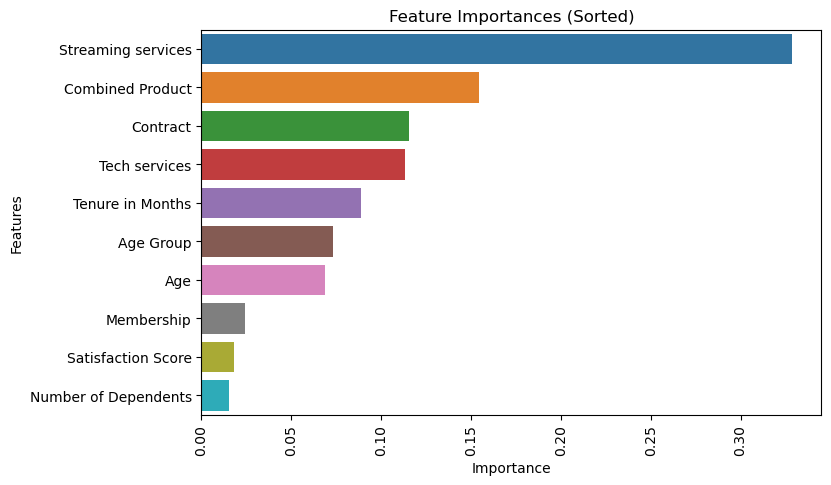

In [16]:
best_rf_model = rf_grid_cv.best_estimator_

best_rf_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_rf_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## DecisionTree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=42)

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}

# DecisionTreeClassifier 객체 생성 후 GridSearchCV 수행
dt_grid_cv = GridSearchCV(dt_clf , param_grid=parameters , cv=2, n_jobs=-1 )
dt_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', dt_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(dt_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.8060


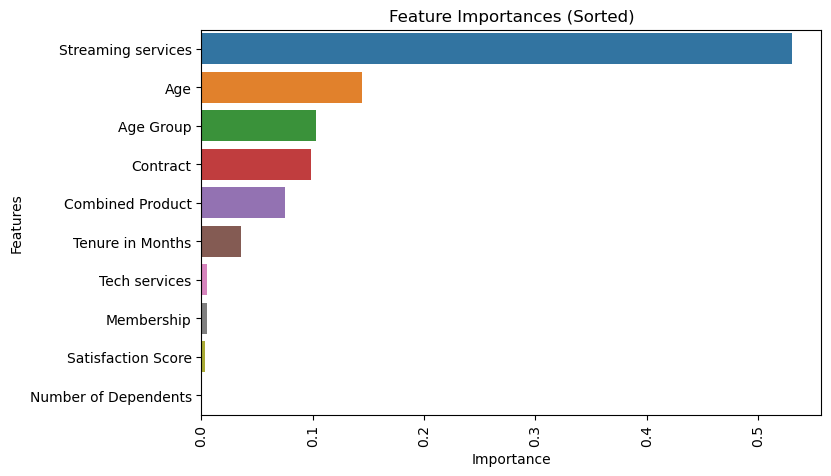

In [18]:
best_dt_model = dt_grid_cv.best_estimator_

best_dt_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_dt_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## GradientBoosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=42)

# 랜덤 시드 설정
random_seed = 42
np.random.seed(random_seed)

params = {
    'n_estimators':[100], # 결정 트리 개수 지정
    'max_depth' : [6, 8, 10, 12], # 트리의 최대 깊이 지정
    'min_samples_leaf' : [8, 12, 18,20,24 ], # 분할된 경우 왼족, 오른쪽의 브랜치 노드에서 가져가야 할 최소한의 샘플 데이터 수
    'min_samples_split' : [8, 16, 20,22,26], # 노드를 분할하기 위한 최소한의 샘플 데이터 수 => 과적합 제어
     'learning_rate' :[random.uniform(0.01, 0.1) for _ in range(5)]    
}


gb_grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2, n_jobs=-1 )
gb_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', gb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gb_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.021811519366239936, 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8269


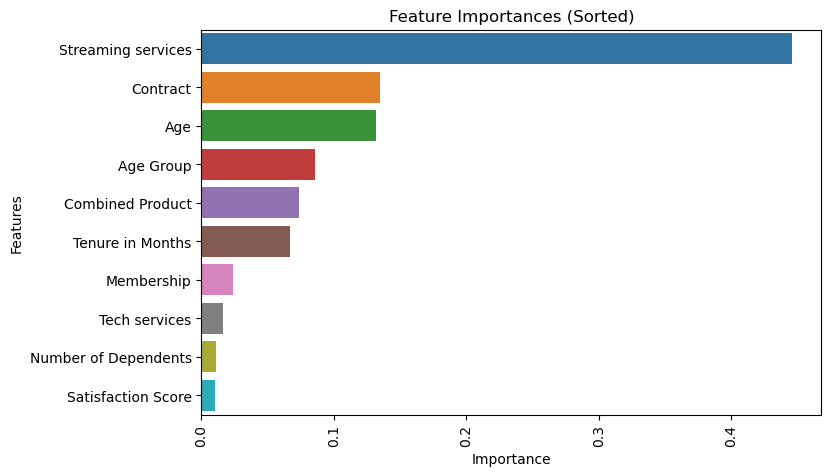

In [20]:
best_gb_model = gb_grid_cv.best_estimator_

best_gb_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_gb_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## XGBoost

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import random

XG_clf = XGBClassifier(random_state=101, objective='binary:logistic')

params = {'n_estimators':[100,200,300,400], 
           'learning_rate' :[0.1, 0.2, 0.3, 0.4],
          'min_child_weight' : [1,2,3,4,5],
          'max_depth' : [1,2,3,4,5]}

xg_grid_cv = GridSearchCV(XG_clf , param_grid=params , cv=2, n_jobs=-1 )
xg_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', xg_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(xg_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100}
최고 예측 정확도: 0.8312


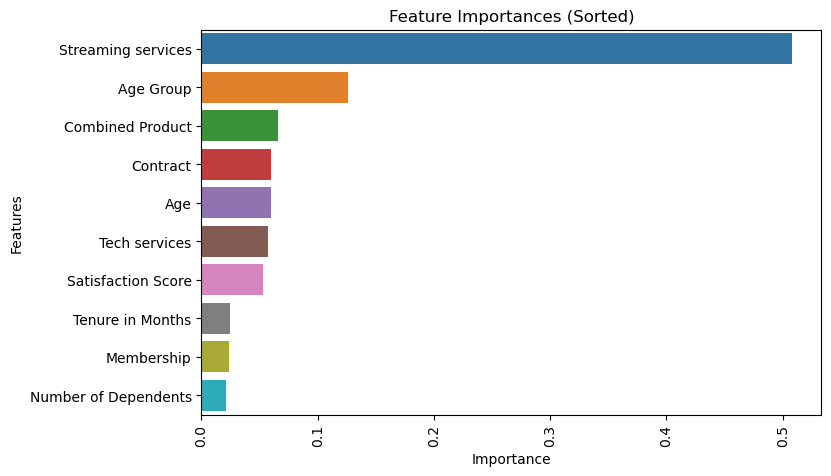

In [22]:
best_xg_model = xg_grid_cv.best_estimator_

best_xg_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_xg_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## LightGBM

In [23]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

params = {'num_leaves' : [8, 12, 18,20,24 ], 'min_data_in_leaf' : [8, 12, 18,20,24 ], 'max_depth' : [2, 3, 5, 10] }

lgb_grid_cv = GridSearchCV(lgb_clf , param_grid=params , cv=2, n_jobs=-1 )
lgb_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', lgb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(lgb_grid_cv.best_score_))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

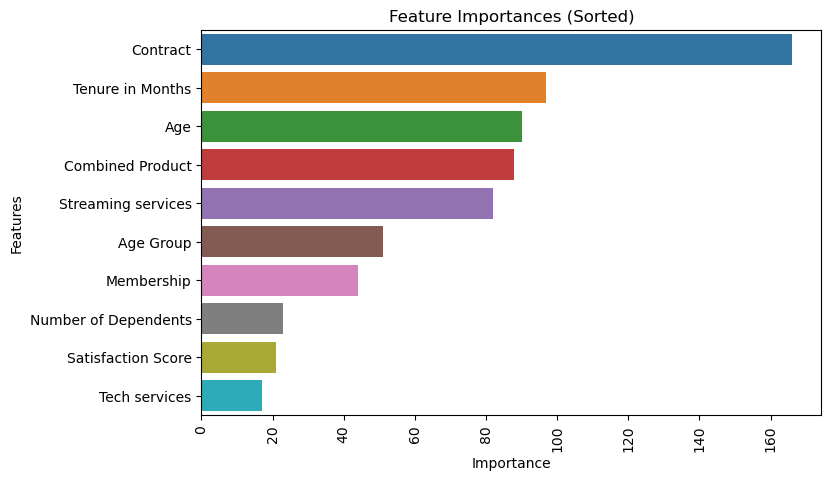

In [24]:
best_lgb_model = lgb_grid_cv.best_estimator_

best_lgb_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_lgb_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

## CatBoost

In [26]:
from catboost import CatBoostClassifier, Pool
cb_clf = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
cb_clf.fit(X_train, y_train)

# 모델을 사용하여 테스트 데이터에 대한 예측 수행
y_pred = cb_clf.predict(X_test)

# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('모델의 정확도:', accuracy)

0:	learn: 0.4650681	total: 142ms	remaining: 142ms
1:	learn: 0.4196475	total: 144ms	remaining: 0us
모델의 정확도: 0.7970191625266146


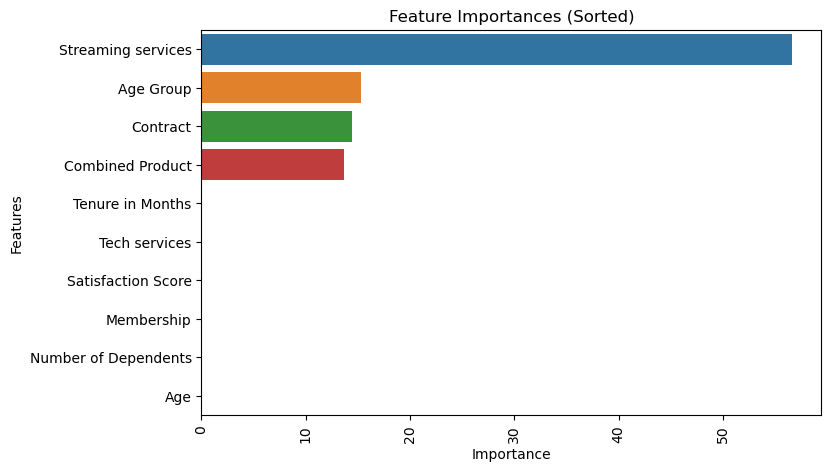

In [27]:
import matplotlib.pyplot as plt

# 모델의 피처 중요도 가져오기
feature_importance = cb_clf.get_feature_importance(type='FeatureImportance')

# 피처 이름 가져오기 (예시: X_train의 열 이름)
feature_names = final_df.columns[:-1]

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importance[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()


# 모델 선택

* RandomForest : 0.8245
* DecisionTree : 0.8060
* GradientBoosting : 0.8269
* **XGBoost : 0.8312**
* **LightGBM : 0.8293 (XGBoost보다 피처 중요도가 좀 더 고르게 나옴)**
* CatBoost : 0.79701

# 모델 적용

In [32]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

params = {'num_leaves' : [8, 12, 18,20,24 ], 'min_data_in_leaf' : [8, 12, 18,20,24 ], 'max_depth' : [2, 3, 5, 10] }

lgb_grid_cv = GridSearchCV(lgb_clf , param_grid=params , cv=2, n_jobs=-1 )
lgb_grid_cv.fit(X_train , y_train)

best_lgb_model = lgb_grid_cv.best_estimator_
best_lgb_model.fit(X_train , y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

LGBMClassifier(max_depth=3, min_data_in_leaf=20, num_leaves=8,
               objective='binary', random_state=101)

In [53]:
# 최적의 모델을 사용하여 테스트 데이터를 예측합니다.
test_data = [[0.413115, 0.333333, 0.6, 0.75, 0.75, 0.333333, 0.0, 0.239437, 0.79850, 0.158013]]
predicted_class = best_lgb_model.predict(test_data)

# 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
predicted_proba = best_lgb_model.predict_proba(test_data)

# 클래스 1일 확률(이탈할 확률)을 출력합니다.
probability_of_class_1 = predicted_proba[0][1]  # 첫 번째 테스트 데이터에 대한 클래스 1일 확률
print("가상 고객이 이탈할 확률:", probability_of_class_1)
print("가상 고객 이탈 점수:", int(probability_of_class_1 * 100), "점")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
가상 고객이 이탈할 확률: 0.4348469358353635
가상 고객 이탈 점수: 43 점
